# 🍅 Tomato Leaf Disease Detection using YOLOv11 (Ultralytics)
    End-to-End Project for Object Detection

## **Download Data**

In [40]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sebastianpalaciob/tomato-leaf-diseases-dataset-for-object-detection")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'tomato-leaf-diseases-dataset-for-object-detection' dataset.
Path to dataset files: /kaggle/input/tomato-leaf-diseases-dataset-for-object-detection


## **Show Data Pathes**

In [48]:
import os

DATASET_PATH = '/kaggle/input/tomato-leaf-diseases-dataset-for-object-detection'

for root, dirs, files in os.walk(DATASET_PATH):
    for d in dirs:
        print(os.path.join(root, d))


/kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection
/kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection/Dataset without augmentation
/kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection/Dataset with augmentation
/kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection/Dataset without augmentation/valid
/kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection/Dataset without augmentation/test
/kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection/Dataset without augmentation/train
/kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection/Dataset without augmentation/valid/labels
/

# 1️⃣ Install dependencies


In [49]:
!pip install ultralytics -q

# 2️⃣ Import libraries

In [50]:
import os
from ultralytics import YOLO
from IPython.display import Image, display
import glob

# 3️⃣ Define dataset paths

In [51]:
DATASET_PATH = "/kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection/Dataset without augmentation"
WORK_DIR = "/kaggle/working/tomato_yolo"
os.makedirs(WORK_DIR, exist_ok=True)

# 4️⃣ Create YOLO YAML configuration

In [52]:
yaml_content = f"""
train: {DATASET_PATH}/train/images
val: {DATASET_PATH}/valid/images
test: {DATASET_PATH}/test/images

nc: 4
names: ['Early_Blight', 'Late_Blight', 'Leaf_Mold', 'Healthy']
"""

yaml_path = os.path.join(WORK_DIR, "tomato.yaml")
with open(yaml_path, "w") as f:
    f.write(yaml_content)

print("✅ YAML file created at:", yaml_path)

✅ YAML file created at: /kaggle/working/tomato_yolo/tomato.yaml


# 5️⃣ Load pre-trained YOLOv11 model

In [53]:
# 5️⃣ Load pre-trained YOLOv11 model
model = YOLO("yolo11n.pt")  # استخدم yolo11s.pt لو عندك GPU قوي


# 6️⃣ Train the model

In [54]:
# 6️⃣ Train the model
results = model.train(
    data=yaml_path,
    epochs=50,          # عدد الـ epochs
    imgsz=640,          # حجم الصورة أثناء التدريب
    batch=16,           # عدد الصور في كل batch
    device=0,           # GPU index
    name="tomato_leaf_detection"
)

print("✅ Training complete. Results saved in:", results.save_dir)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/tomato_yolo/tomato.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=tomato_leaf_detection9, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

# 7️⃣ Validate the model

In [55]:
# 7️⃣ Validate the model
metrics = model.val()
print("📊 Validation metrics:", metrics)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.9±2.0 ms, read: 68.2±18.6 MB/s, size: 53.4 KB)
val: Scanning /kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection/Dataset without augmentation/valid/labels... 659 images, 0 backgrounds, 356 corrupt: 100% ━━━━━━━━━━━━ 659/659 197.2it/s 3.3s
val: /kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection/Dataset without augmentation/valid/images/0_jpg.rf.2a3f4861f3a8ce5568b70142ea9e1715.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 4. Possible class labels are 0-3
val: /kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection/Dataset without augmentation/valid/images/11-40580_5_jpg.rf.47c60d8

# 8️⃣ Run predictions on test images

In [56]:
# 8️⃣ Run predictions on test images
test_images = f"{DATASET_PATH}/test/images"
preds = model.predict(source=test_images, conf=0.5, save=True)
print("✅ Predictions complete. Check 'runs/detect/predict' for results.")


image 1/420 /kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection/Dataset without augmentation/test/images/039b47d574bc4bb8a14259a1cd96a741_jpg.rf.71ea2112b30a2e2f33839ed9c69aa151.jpg: 640x640 1 Early_Blight, 8.0ms
image 2/420 /kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection/Dataset without augmentation/test/images/151b36defa8ccfe2fd90f4a342affd5a-tobacco-mosaic-virus-the-two_jpg.rf.c39c61aaf54d55dcc1079dd1bee45fc0.jpg: 640x640 1 Late_Blight, 8.0ms
image 3/420 /kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection/Dataset without augmentation/test/images/1c6727083428411181e9b58b4778c6b7_jpg.rf.086a74786a177eb2d08527ee03e024c8.jpg: 640x640 2 Healthys, 7.9ms
image 4/420 /kaggle/input/tomato-leaf-diseases-dataset-for-object-detection/Tomato leaf diseases dataset for Object Detection/Dataset without augmenta

# 9️⃣ Display a sample prediction image

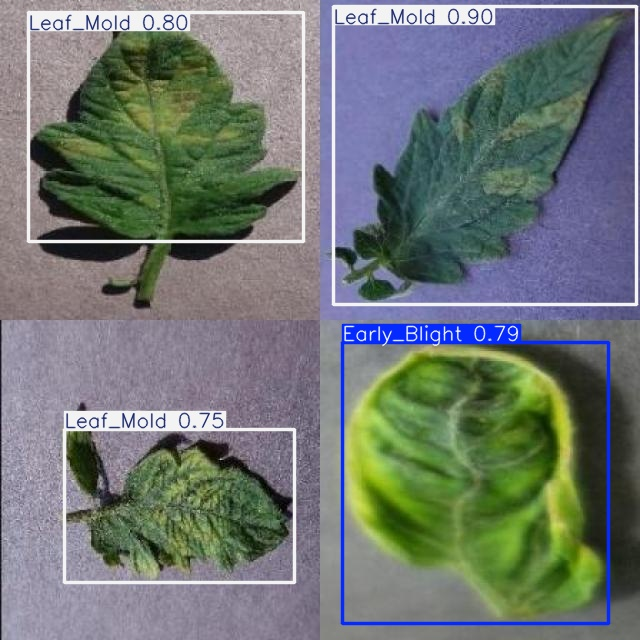

🖼️ Example prediction displayed.


In [61]:

# 9️⃣ Display a sample prediction image
pred_dir = sorted(glob.glob("runs/detect/predict*"))[-1]
sample_image = glob.glob(os.path.join(pred_dir, "*.jpg"))[70]
display(Image(filename=sample_image))
print("🖼️ Example prediction displayed.")
